

본 프로젝트는 지역별, 시간대별 범죄 유형의 차이점을 찾기 위한 프로젝트이다.

특정 지역이 어떤 범죄에 취약한지 시각화를 통해 알아내며 보완할 점을 알아내는것을 목표로 한다.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_timeSeries = pd.read_csv("/content/경찰청_범죄 발생 시간대 및 요일_20191231.csv",encoding="cp949")#인코딩 방식 지정
df_timeSeries.head()

,범죄대분류,범죄중분류,0시00분-02시59분,03시00분-05시59분,06시00분-08시59분,09시00분-11시59분,12시00분-14시59분,15시00분-17시59분,18시00분-20시59분,21시00분-23시59분,미상,일,월,화,수,목,금,토
0,강력범죄,살인기수,15,21,20,28,38,33,43,49,50,38,45,48,40,37,49,40
1,강력범죄,살인미수등,33,50,29,44,46,60,66,82,72,71,70,68,62,73,85,53
2,강력범죄,강도,105,131,44,59,68,72,81,107,131,111,113,116,105,124,121,108
3,강력범죄,강간,630,885,417,293,325,311,425,719,1305,869,686,734,719,682,722,898
4,강력범죄,유사강간,102,110,57,62,60,55,66,89,181,145,99,109,92,89,112,136


In [3]:
df_timeSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   범죄대분류          38 non-null     object
 1   범죄중분류          38 non-null     object
 2   0시00분-02시59분   38 non-null     int64 
 3   03시00분-05시59분  38 non-null     int64 
 4   06시00분-08시59분  38 non-null     int64 
 5   09시00분-11시59분  38 non-null     int64 
 6   12시00분-14시59분  38 non-null     int64 
 7   15시00분-17시59분  38 non-null     int64 
 8   18시00분-20시59분  38 non-null     int64 
 9   21시00분-23시59분  38 non-null     int64 
 10  미상             38 non-null     int64 
 11  일              38 non-null     int64 
 12  월              38 non-null     int64 
 13  화              38 non-null     int64 
 14  수              38 non-null     int64 
 15  목              38 non-null     int64 
 16  금              38 non-null     int64 
 17  토              38 non-null     int64 
dtypes: int64(16), object(2)
memory u

In [4]:
df_loc = pd.read_csv("/content/경찰청_범죄 발생 지역별 통계_20221231.csv",encoding="cp949")
df_loc.head()

,범죄대분류,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종,...,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
0,강력범죄,살인기수,35,29,16,14,1,6,8,2,...,1,2,1,2,5,0,1,3,4,19
1,강력범죄,살인미수등,68,24,15,38,2,11,7,3,...,2,0,3,1,11,1,4,4,1,43
2,강력범죄,강도,118,43,31,30,10,17,10,2,...,1,1,0,0,12,5,1,4,1,28
3,강력범죄,강간,1200,347,215,340,152,200,112,26,...,6,12,36,41,77,19,17,78,18,375
4,강력범죄,유사강간,219,83,43,61,32,34,14,6,...,0,2,3,2,14,4,8,13,3,52


In [5]:
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 89 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   범죄대분류   38 non-null     object
 1   범죄중분류   38 non-null     object
 2   서울      38 non-null     int64 
 3   부산      38 non-null     int64 
 4   대구      38 non-null     int64 
 5   인천      38 non-null     int64 
 6   광주      38 non-null     int64 
 7   대전      38 non-null     int64 
 8   울산      38 non-null     int64 
 9   세종      38 non-null     int64 
 10  경기 고양   38 non-null     int64 
 11  경기 과천   38 non-null     int64 
 12  경기 광명   38 non-null     int64 
 13  경기 광주   38 non-null     int64 
 14  경기 구리   38 non-null     int64 
 15  경기 군포   38 non-null     int64 
 16  경기 김포   38 non-null     int64 
 17  경기 남양주  38 non-null     int64 
 18  경기 동두천  38 non-null     int64 
 19  경기 부천   38 non-null     int64 
 20  경기 성남   38 non-null     int64 
 21  경기 수원   38 non-null     int64 
 22  경기 시흥   38 non-null     int6

In [6]:
merged_df = pd.merge(df_timeSeries, df_loc, on=['범죄대분류', '범죄중분류'], how='inner')
merged_df.head()

,범죄대분류,범죄중분류,0시00분-02시59분,03시00분-05시59분,06시00분-08시59분,09시00분-11시59분,12시00분-14시59분,15시00분-17시59분,18시00분-20시59분,21시00분-23시59분,...,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
0,강력범죄,살인기수,15,21,20,28,38,33,43,49,...,1,2,1,2,5,0,1,3,4,19
1,강력범죄,살인미수등,33,50,29,44,46,60,66,82,...,2,0,3,1,11,1,4,4,1,43
2,강력범죄,강도,105,131,44,59,68,72,81,107,...,1,1,0,0,12,5,1,4,1,28
3,강력범죄,강간,630,885,417,293,325,311,425,719,...,6,12,36,41,77,19,17,78,18,375
4,강력범죄,유사강간,102,110,57,62,60,55,66,89,...,0,2,3,2,14,4,8,13,3,52


In [7]:
# 시간대와 지역 열 리스트
time_columns = [
    '0시00분-02시59분', '03시00분-05시59분', '06시00분-08시59분', '09시00분-11시59분',
    '12시00분-14시59분', '15시00분-17시59분', '18시00분-20시59분', '21시00분-23시59분'
]

region_columns = [
    '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기 고양', '경기 과천', '경기 광명',
    '경기 광주', '경기 구리', '경기 군포', '경기 김포', '경기 남양주', '경기 동두천', '경기 부천',
    '경기 성남', '경기 수원', '경기 시흥', '경기 안산', '경기 안성', '경기 안양', '경기 양주', '경기 여주',
    '경기 오산', '경기 용인', '경기 의왕', '경기 의정부', '경기 이천', '경기 파주', '경기 평택', '경기 포천',
    '경기 하남', '경기 화성', '강원 강릉', '강원 동해', '강원 삼척', '강원 속초', '강원 원주', '강원 춘천',
    '강원 태백', '충북 제천', '충북 청주', '충북 충주', '충남 계룡', '충남 공주', '충남 논산', '충남 당진',
    '충남 보령', '충남 서산', '충남 아산', '충남 천안', '전북 군산', '전북 김제', '전북 남원', '전북 익산',
    '전북 전주', '전북 정읍', '전남 광양', '전남 나주', '전남 목포', '전남 순천', '전남 여수', '경북 경산',
    '경북 경주', '경북 구미', '경북 김천', '경북 문경', '경북 상주', '경북 안동', '경북 영주', '경북 영천',
    '경북 포항', '경남 거제', '경남 김해', '경남 밀양', '경남 사천', '경남 양산', '경남 진주', '경남 창원',
    '경남 통영', '제주 서귀포', '제주 제주', '기타도시', '도시이외'
]

time_df = pd.melt(
    merged_df,
    id_vars=['범죄대분류', '범죄중분류'] + region_columns,
    value_vars=time_columns,
    var_name='시간대',
    value_name='범죄발생건수'
)

time_df.head()



,범죄대분류,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종,...,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외,시간대,범죄발생건수
0,강력범죄,살인기수,35,29,16,14,1,6,8,2,...,1,2,5,0,1,3,4,19,0시00분-02시59분,15
1,강력범죄,살인미수등,68,24,15,38,2,11,7,3,...,3,1,11,1,4,4,1,43,0시00분-02시59분,33
2,강력범죄,강도,118,43,31,30,10,17,10,2,...,0,0,12,5,1,4,1,28,0시00분-02시59분,105
3,강력범죄,강간,1200,347,215,340,152,200,112,26,...,36,41,77,19,17,78,18,375,0시00분-02시59분,630
4,강력범죄,유사강간,219,83,43,61,32,34,14,6,...,3,2,14,4,8,13,3,52,0시00분-02시59분,102


In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

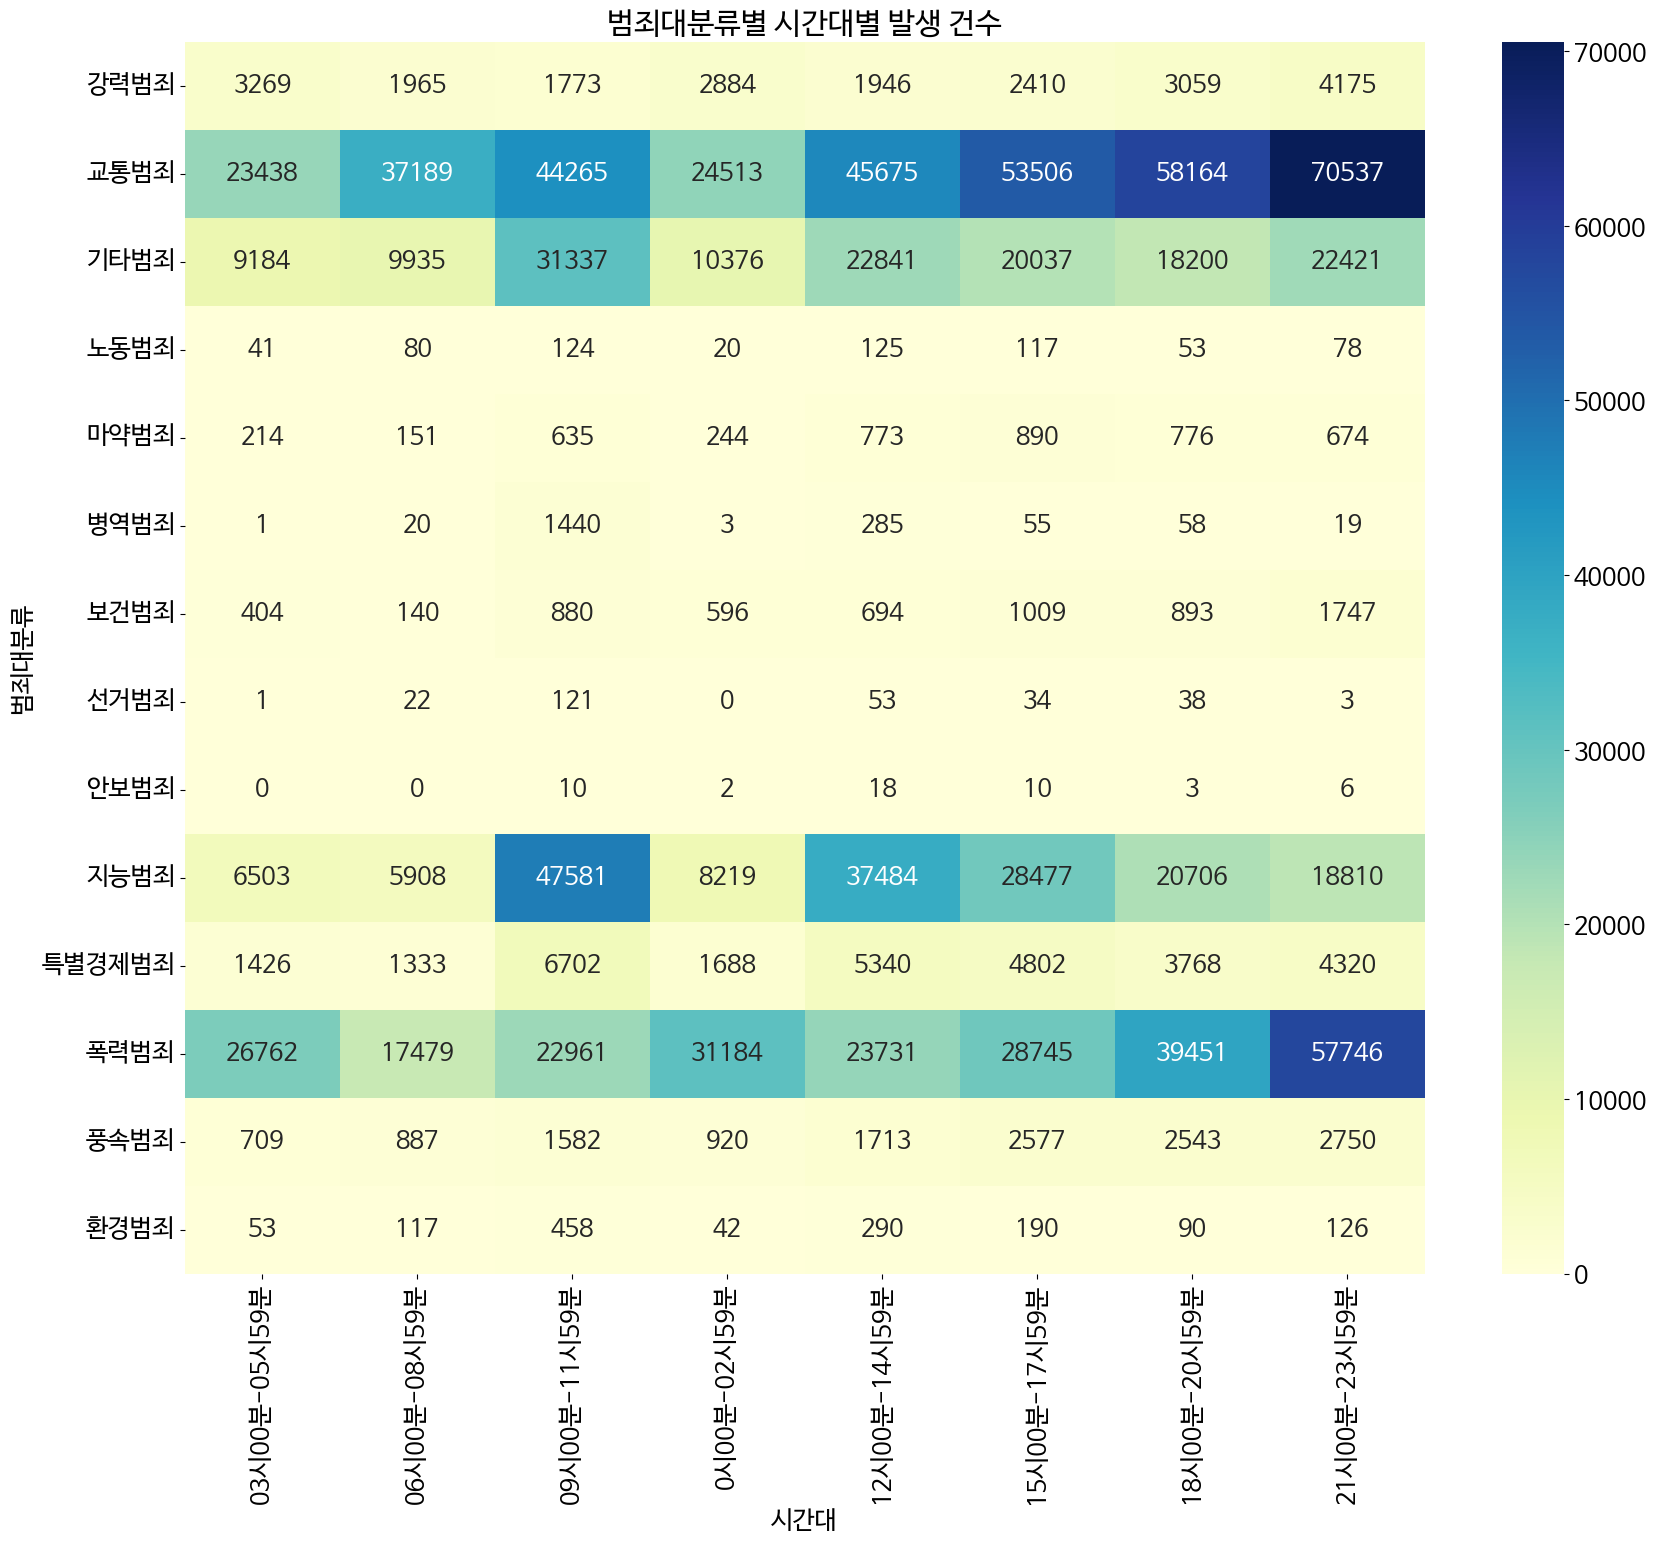

In [9]:
category_time_data = time_df.groupby(['범죄대분류', '시간대'])['범죄발생건수'].sum().reset_index()
heatmap_data = category_time_data.pivot(index="범죄대분류", columns="시간대", values="범죄발생건수")

plt.figure(figsize=(20, 16))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("범죄대분류별 시간대별 발생 건수")
plt.xlabel("시간대")
plt.ylabel("범죄대분류")
plt.show()


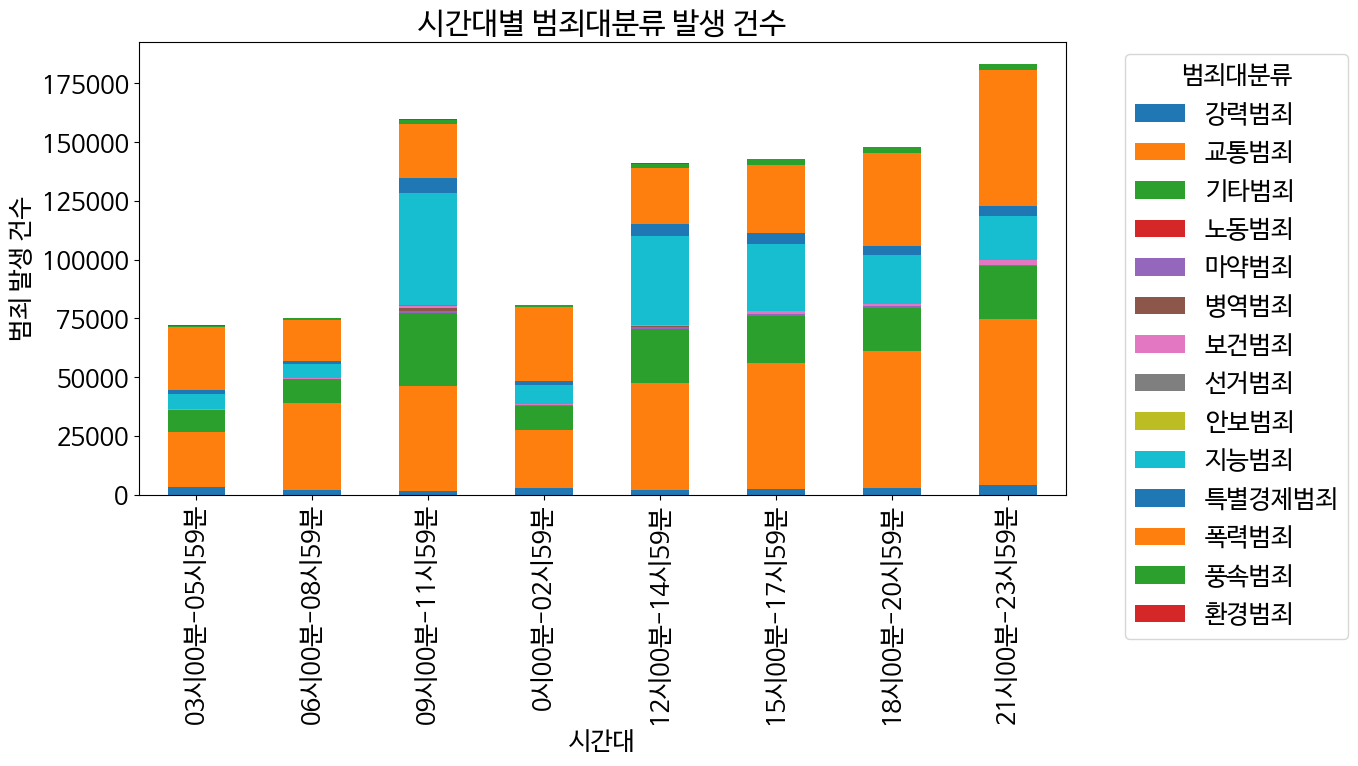

In [10]:
category_time_data = time_df.groupby(['시간대', '범죄대분류'])['범죄발생건수'].sum().unstack()

# 스택형 바 차트 생성
category_time_data.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title("시간대별 범죄대분류 발생 건수")
plt.xlabel("시간대")
plt.ylabel("범죄 발생 건수")
plt.legend(title="범죄대분류", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

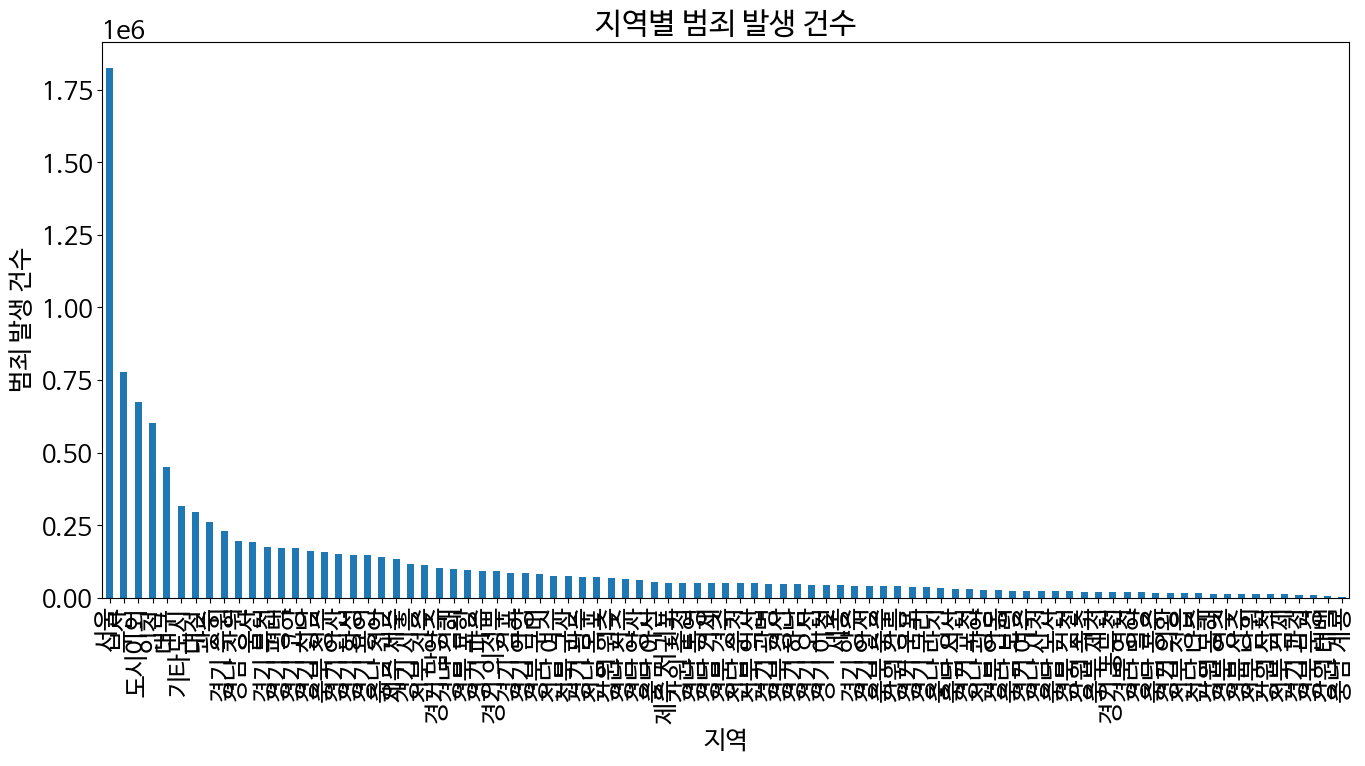

In [11]:
import matplotlib.pyplot as plt

region_columns = [
    '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기 고양', '경기 과천', '경기 광명',
    '경기 광주', '경기 구리', '경기 군포', '경기 김포', '경기 남양주', '경기 동두천', '경기 부천',
    '경기 성남', '경기 수원', '경기 시흥', '경기 안산', '경기 안성', '경기 안양', '경기 양주', '경기 여주',
    '경기 오산', '경기 용인', '경기 의왕', '경기 의정부', '경기 이천', '경기 파주', '경기 평택', '경기 포천',
    '경기 하남', '경기 화성', '강원 강릉', '강원 동해', '강원 삼척', '강원 속초', '강원 원주', '강원 춘천',
    '강원 태백', '충북 제천', '충북 청주', '충북 충주', '충남 계룡', '충남 공주', '충남 논산', '충남 당진',
    '충남 보령', '충남 서산', '충남 아산', '충남 천안', '전북 군산', '전북 김제', '전북 남원', '전북 익산',
    '전북 전주', '전북 정읍', '전남 광양', '전남 나주', '전남 목포', '전남 순천', '전남 여수', '경북 경산',
    '경북 경주', '경북 구미', '경북 김천', '경북 문경', '경북 상주', '경북 안동', '경북 영주', '경북 영천',
    '경북 포항', '경남 거제', '경남 김해', '경남 밀양', '경남 사천', '경남 양산', '경남 진주', '경남 창원',
    '경남 통영', '제주 서귀포', '제주 제주', '기타도시', '도시이외'
]

region_data = time_df[region_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
region_data.plot(kind='bar')
plt.title("지역별 범죄 발생 건수")
plt.xlabel("지역")
plt.ylabel("범죄 발생 건수")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


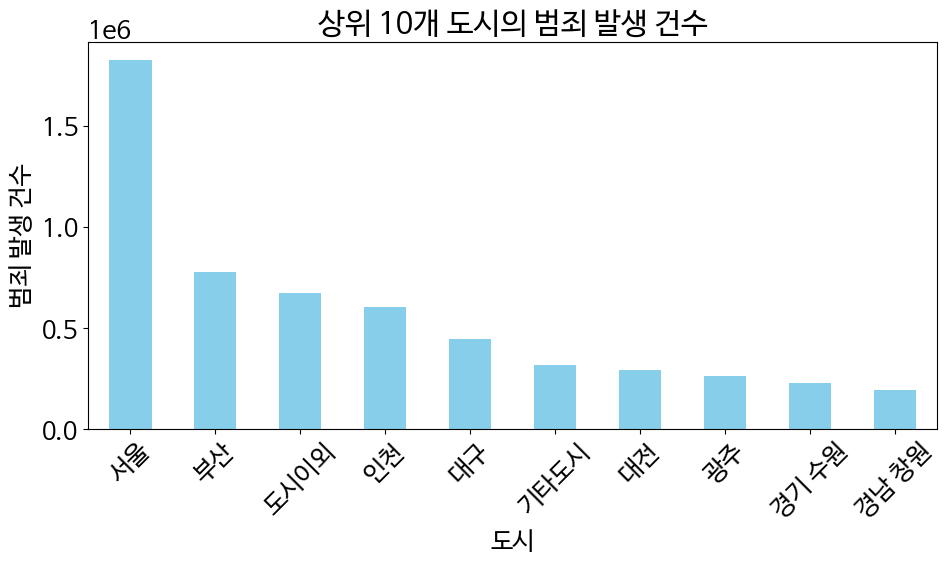

In [12]:
import matplotlib.pyplot as plt

top_10_region_data = region_data.head(10)

plt.figure(figsize=(10, 6))
top_10_region_data.plot(kind='bar', color='skyblue')
plt.title("상위 10개 도시의 범죄 발생 건수")
plt.xlabel("도시")
plt.ylabel("범죄 발생 건수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
df_population = pd.read_csv("/content/인구수.csv",encoding="utf-8")
print(df_population)


df_population.columns = ['도시명', '인구수']
# 쉼표 제거 및 숫자로 변환
df_population['인구수'] = df_population['인구수'].str.replace(',', '').astype(int)
# 정리된 데이터 확인
df_population.head()




             도시명 51,692,310
0          서울특별시  9,407,540
1          부산광역시  3,320,276
2          인천광역시  2,964,820
3          대구광역시  2,365,619
4          대전광역시  1,446,749
..           ...        ...
155  전북특별자치도 진안군     22,998
156  강원특별자치도 양구군     22,355
157  전북특별자치도 장수군     21,395
158     경상북도 영양군     16,579
159     경상북도 울릉군      6,210

[160 rows x 2 columns]


,도시명,인구수
0,서울특별시,9407540
1,부산광역시,3320276
2,인천광역시,2964820
3,대구광역시,2365619
4,대전광역시,1446749


In [17]:
import pandas as pd

# CSV 데이터 불러오기
df_population = pd.read_csv("/content/인구수.csv", encoding="utf-8")

# 컬럼명 수정
df_population.columns = ['도시명', '인구수']

# 쉼표 제거 및 숫자로 변환
df_population['인구수'] = df_population['인구수'].str.replace(',', '').astype(int)

# wide 형식으로 변환
df_population_wide = df_population.set_index('도시명').T

# 결과 확인
print(df_population_wide)


도시명    서울특별시    부산광역시    인천광역시    대구광역시    대전광역시    광주광역시  경기도 수원특례시    울산광역시  \
인구수  9407540  3320276  2964820  2365619  1446749  1432049    1190368  1111371   

도시명  경기도 용인특례시  경기도 고양특례시  ...  강원특별자치도 양양군  강원특별자치도 화천군  경상북도 청송군  전라남도 구례군  \
인구수    1075570    1075202  ...        25556        24625     24441     24420   

도시명  전북특별자치도 무주군  전북특별자치도 진안군  강원특별자치도 양구군  전북특별자치도 장수군  경상북도 영양군  경상북도 울릉군  
인구수        23195        22998        22355        21395     16579      6210  

[1 rows x 160 columns]


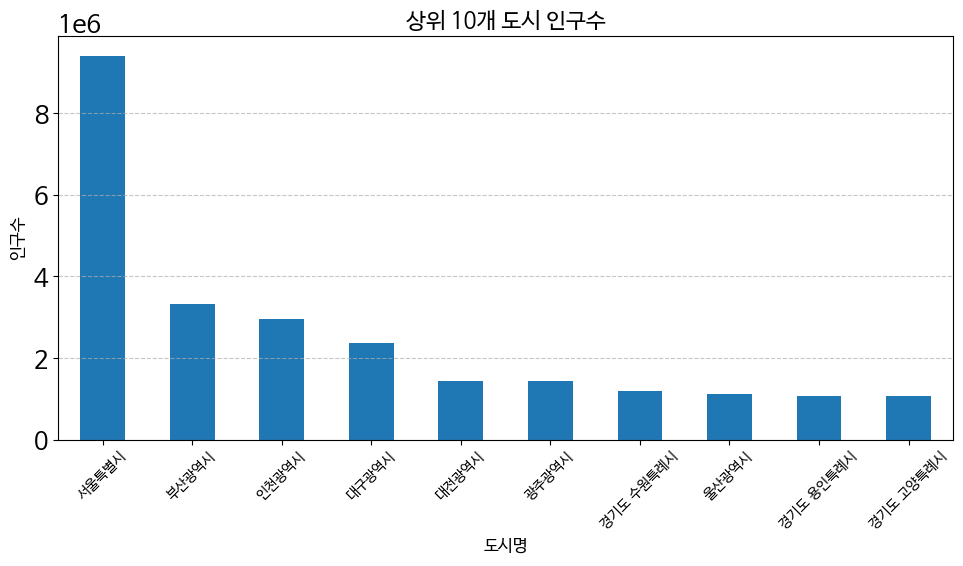

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 상위 10개 도시 추출
top_10_cities = df_population_wide.loc['인구수'].sort_values(ascending=False).head(10)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
top_10_cities.plot(kind='bar')
plt.title('상위 10개 도시 인구수', fontsize=16)
plt.xlabel('도시명', fontsize=12)
plt.ylabel('인구수', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 출력
plt.show()


In [47]:
print(df_population_wide.columns)

Index(['서울특별시', '부산광역시', '인천광역시', '대구광역시', '대전광역시', '광주광역시', '경기도 수원특례시',
       '울산광역시', '경기도 용인특례시', '경기도 고양특례시',
       ...
       '강원특별자치도 양양군', '강원특별자치도 화천군', '경상북도 청송군', '전라남도 구례군', '전북특별자치도 무주군',
       '전북특별자치도 진안군', '강원특별자치도 양구군', '전북특별자치도 장수군', '경상북도 영양군', '경상북도 울릉군'],
      dtype='object', name='도시명', length=160)


In [45]:
import pandas as pd

# CSV 파일 읽기
df_loc = pd.read_csv("/content/경찰청_범죄 발생 지역별 통계_20221231.csv", encoding="cp949")

# '범죄대분류'와 '범죄중분류' 열 제거
df_cleaned = df_loc.drop(columns=['범죄대분류', '범죄중분류'])

# 각 행의 값을 합산하여 하나의 행으로 변환
df_summed = pd.DataFrame(df_cleaned.sum(axis=0)).T

# 결과 출력
print(df_summed.columns)


Index(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기 고양', '경기 과천',
       '경기 광명', '경기 광주', '경기 구리', '경기 군포', '경기 김포', '경기 남양주', '경기 동두천',
       '경기 부천', '경기 성남', '경기 수원', '경기 시흥', '경기 안산', '경기 안성', '경기 안양', '경기 양주',
       '경기 여주', '경기 오산', '경기 용인', '경기 의왕', '경기 의정부', '경기 이천', '경기 파주', '경기 평택',
       '경기 포천', '경기 하남', '경기 화성', '강원 강릉', '강원 동해', '강원 삼척', '강원 속초', '강원 원주',
       '강원 춘천', '강원 태백', '충북 제천', '충북 청주', '충북 충주', '충남 계룡', '충남 공주', '충남 논산',
       '충남 당진', '충남 보령', '충남 서산', '충남 아산', '충남 천안', '전북 군산', '전북 김제', '전북 남원',
       '전북 익산', '전북 전주', '전북 정읍', '전남 광양', '전남 나주', '전남 목포', '전남 순천', '전남 여수',
       '경북 경산', '경북 경주', '경북 구미', '경북 김천', '경북 문경', '경북 상주', '경북 안동', '경북 영주',
       '경북 영천', '경북 포항', '경남 거제', '경남 김해', '경남 밀양', '경남 사천', '경남 양산', '경남 진주',
       '경남 창원', '경남 통영', '제주 서귀포', '제주 제주', '기타도시', '도시이외'],
      dtype='object')


In [51]:
import pandas as pd

# 데이터프레임 읽기
df_loc = pd.read_csv("/content/경찰청_범죄 발생 지역별 통계_20221231.csv", encoding="cp949")

# 범죄 데이터 전처리
df_summed = df_loc.drop(columns=["범죄대분류", "범죄중분류"]).sum(axis=0).to_frame().T
df_summed.columns.name = None  # 컬럼 이름 인덱스 해제

# 도시 이름 리스트 추출
crime_cities = df_summed.columns
population_cities = df_population_wide.columns

# 도시 이름 매핑 생성
city_mapping = {}
for crime_city in crime_cities:
    for pop_city in population_cities:
        if crime_city in pop_city or pop_city in crime_city:
            city_mapping[crime_city] = pop_city
            break

# 매핑 결과를 데이터프레임에 반영
df_summed_renamed = df_summed.rename(columns=city_mapping)

# 공통 도시 추출 (set → list 변환)
common_cities = list(set(df_summed_renamed.columns).intersection(set(df_population_wide.columns)))

# 범죄 발생 건수와 인구수 비율 계산
crime_population_ratio = pd.DataFrame({
    "범죄 발생 건수": df_summed_renamed[common_cities].iloc[0],
    "인구수": df_population_wide.loc["인구수", common_cities]
})
crime_population_ratio["비율"] = crime_population_ratio["범죄 발생 건수"] / crime_population_ratio["인구수"]

# 결과 출력
print(crime_population_ratio)


         범죄 발생 건수      인구수        비율
대전광역시       43200  1446749  0.029860
광주광역시       38408  1432049  0.026820
서울특별시      267778  9407540  0.028464
부산광역시      112080  3320276  0.033756
울산광역시       27385  1111371  0.024641
세종특별자치시      6525   342328  0.019061
인천광역시       84888  2964820  0.028632
대구광역시       66441  2365619  0.028086


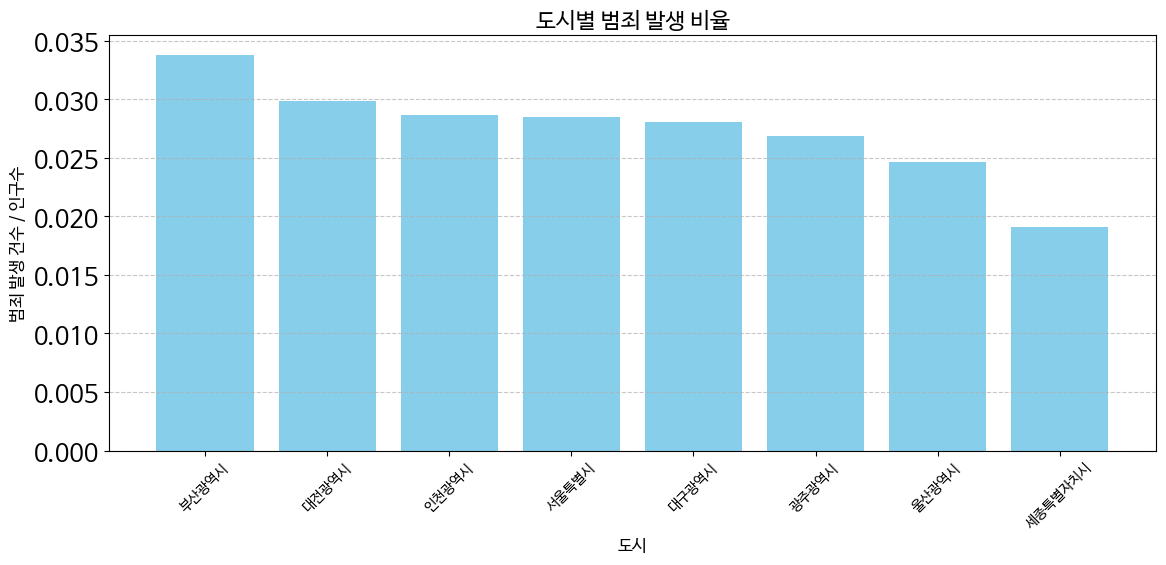

In [50]:
import matplotlib.pyplot as plt

# 범죄 비율 데이터를 정렬
crime_population_ratio_sorted = crime_population_ratio.sort_values(by="비율", ascending=False)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(crime_population_ratio_sorted.index, crime_population_ratio_sorted["비율"], color="skyblue")
plt.title("도시별 범죄 발생 비율", fontsize=16)
plt.xlabel("도시", fontsize=12)
plt.ylabel("범죄 발생 건수 / 인구수", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# 그래프 출력
plt.show()
